## Data indexing, simulation, and summary statistics
You should now be able to manipulate 2D arrays of various sizes. In this final NumPy section, we will explore how to do some serious aspects of data handling that are important for reproducible research:

* Simulating data - when designing experiments, you can simulate data to plan your analysis correctly.
* Data cleaning, and preparation - finding certain cases to extract/outliers to remove
* Basic summary statistics - computing the mean, median, standard deviation

These are all essential parts of any reproducible analysis workflow, but you may not have undertaken these steps yourself in the past depending on your research experience.


In [1]:
import numpy as np

### Simulating data
Why would we want to simulate data? One reason is to plan our analyses before we start. In the past, psychologists would throw statistical tests at a dataset they had collected because a particular test 'fit' the data. 

However, if you have some data in hand to start, you can carefully plan your analysis (perhaps as part of a pre-registration), or use it to highlight issues with your design you might not have foreseen.


### The `np.random` module
NumPy has all the tools we need to generate random data, in a submodule called `random`. This module contains a huge range of possible distributions that you can randomly generate data from - such as the normal distribution, an *F* distribution, chi-square, and so on. 

Most psychological data is normally distributed. How can we make an array of normally distributed data? Using the function `normal` in the `random` module of NumPy - `np.random.normal()`

In [2]:
# Demonstrate use of normal - distribution has a mean of zero and SD of 1
single_int = np.random.normal()

# Pass in dimension values as arguments to create a very long row of random numbers!
lots = np.random.normal(size=1000)

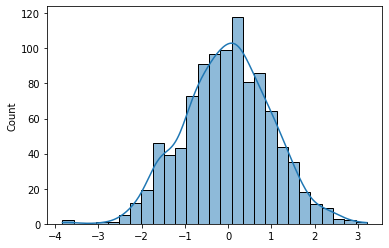

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

show_fig, ax = plt.subplots(1,1)

sns.histplot(lots, ax=ax, kde=True);

`np.random.normal` has keyword arguments to create distributions of different widths, centred on different means. The utility of this is obvious - you can generate samples for different variables, as if you had collected the data already.

In [4]:
# Compared to original....
# Same width, different mean
mean2 = np.random.normal(loc=2.0, scale=1, size=1000)

# Different width, same mean 
sd2 = np.random.normal(loc=0.0, scale=3, size=1000)

# Different width, different mean
diff = np.random.normal(loc=-10.0, scale=0.5, size=1000)

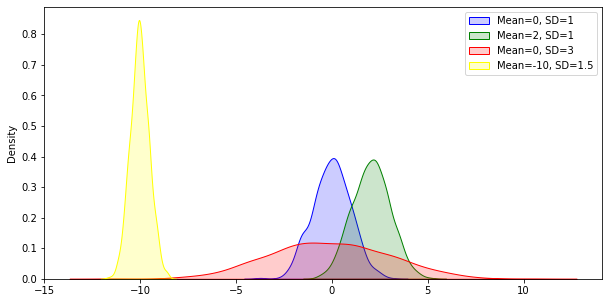

In [5]:
show_fig, axes = plt.subplots(1,1, figsize=(10,5))

sns.kdeplot(lots, label='Mean=0, SD=1', color='blue', alpha=0.2, ax=axes, fill=True)
sns.kdeplot(mean2,label='Mean=2, SD=1', color='green', alpha=0.2, ax=axes, fill=True)
sns.kdeplot(sd2, label='Mean=0, SD=3', color='red', alpha=0.2, ax=axes, fill=True)
sns.kdeplot(diff, label='Mean=-10, SD=1.5', color='yellow', alpha=0.2, ax=axes, fill=True)
axes.legend();

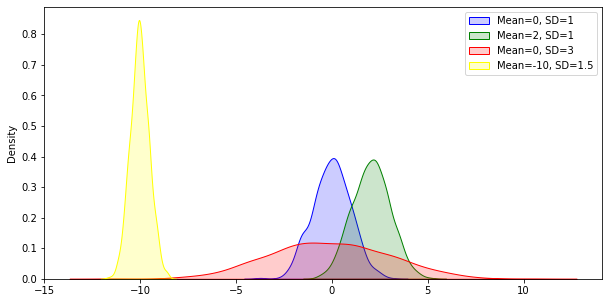

In [6]:
# Illustrate
show_fig

There are other useful functions for generating data - for example, `np.random.randint` can generate datasets of a specific size and shape, of numbers between a certain bound.

In [7]:
# Generate some fake personality data with `randint`, for 100 participants
big5 = np.random.randint(low=1, high=6, size=(100, 5))

print(big5[:5, :])

[[5 5 4 4 4]
 [2 4 3 1 3]
 [1 2 2 1 5]
 [3 3 1 4 2]
 [1 2 5 5 5]]


### Data cleaning and preparation
Almost all datasets require some form of cleaning - removal of participants who didn't complete all the trials, variables with too many missing values, or scores outside acceptable ranges. You may not have had the opportunity to do this yourself at this stage, or maybe you did it manually in Excel or other data pipelines. 

As you might expect, Python and NumPy can find data that fits a certain critera and lets you specify exactly what you want to do to it. You've already used the basic tools of this approach before - logicals. The difference now is that these logicals are computed for every value in an array, whatever its shape, giving you wide flexibility. In fact, most operations return a *Boolean array*, sometimes known as a 'mask', where your conditional is true/false. 

In [8]:
# An example of NumPy boolean logic
toy = np.random.randint(low=1, high=11, size=(10, 4))
print(toy)

[[ 3 10  7  3]
 [ 1  2  8  9]
 [ 5  4  6  8]
 [ 7  1  6  8]
 [ 6  1  1  5]
 [ 7  7  7  2]
 [ 2  2  1  6]
 [ 8  8 10  3]
 [ 2  2  3  8]
 [ 3  1  6  3]]


In [9]:
# Find scores above 6
above6 = toy > 6
print(np.column_stack((toy, above6)))

[[ 3 10  7  3  0  1  1  0]
 [ 1  2  8  9  0  0  1  1]
 [ 5  4  6  8  0  0  0  1]
 [ 7  1  6  8  1  0  0  1]
 [ 6  1  1  5  0  0  0  0]
 [ 7  7  7  2  1  1  1  0]
 [ 2  2  1  6  0  0  0  0]
 [ 8  8 10  3  1  1  1  0]
 [ 2  2  3  8  0  0  0  1]
 [ 3  1  6  3  0  0  0  0]]


Now that we have a Boolean array, or a masked array, we can use it to extract values in our array through array indexing. Let's say we want all the values above 5.

In [10]:
# Use the mask array
extract = toy[above6]
print(extract)

[10  7  8  9  8  7  8  7  7  7  8  8 10  8]


Since the shape of the original array could not be preserved after indexing, NumPy collapsed it into a vector.

Also remember you can negate Booleans with `~`. So, we can easily get all values *not less than 6*:

In [11]:
extract2 = toy[~above6]
print(extract2)

[3 3 1 2 5 4 6 1 6 6 1 1 5 2 2 2 1 6 3 2 2 3 3 1 6 3]


### Building complexity with Boolean indexing - `.all()` and `.any()`
Getting the actual numbers that fit a certain criteria is clearly simple. However, sometimes we need more complex indexing.

Imagine you have data and someone has entered in some out-of-range values. This means they were likely not paying attention, and you can't trust their data on the other trials. How can we remove them, and just analyse the rest of the data?

In [12]:
# First, make a simple dataset
removals = np.random.randint(low=3, high=21, size=(15, 4))

# Here, we generate a 'mask array' using random.choice which chooses elements from a list at random and generates a specific shape, and probabilites
inds = np.random.choice([True, False], p=[0.1, 0.9], size=removals.shape)

# Now place the 'mask' over 'removals' and alter the numbers by replacing with a high number
removals[inds] = 999

print(removals)

[[  4   8  12   7]
 [  7 999   4  10]
 [  5   5   5   7]
 [ 16   9 999  15]
 [ 10  15  15 999]
 [  4 999   7 999]
 [ 20   7  14  13]
 [  3 999   5   6]
 [  7   7  11   6]
 [ 14 999   4 999]
 [ 15   5  18  13]
 [  7   9   5  14]
 [  8  20   6  17]
 [  9  12  12  12]
 [ 19  11   8  11]]


In [13]:
# To find those erroneous participants is easy - create a new mask array
mask = removals > 20

print(mask)

[[False False False False]
 [False  True False False]
 [False False False False]
 [False False  True False]
 [False False False  True]
 [False  True False  True]
 [False False False False]
 [False  True False False]
 [False False False False]
 [False  True False  True]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]]


Now we have our mask, how can we use it to remove the participants who have made an error and given '999' as a response? We already know that subsetting the current 'mask' array will return a single vector, but what we want to do is completely remove the rows that contain problematic entries.

The solution is to use the array methods of `.any()` and `.all()`. These powerful methods allow you to identify which rows or columns match a condition.

In [14]:
# Demonstrate any on mask array
# Moving across columns (axis 1), what rows have ANY values above 20?
remove_rows = mask.any(axis=1)

# Now use remove_rows to clean the data!
clean = removals[~remove_rows, :]

print(clean)

[[ 4  8 12  7]
 [ 5  5  5  7]
 [20  7 14 13]
 [ 7  7 11  6]
 [15  5 18 13]
 [ 7  9  5 14]
 [ 8 20  6 17]
 [ 9 12 12 12]
 [19 11  8 11]]


In [15]:
# The reverse is easily done - what if we wanted to remove any column with a True?
remove_cols = mask.any(axis=0)

# Empty!!
print(removals[:, ~remove_cols])

[[ 4]
 [ 7]
 [ 5]
 [16]
 [10]
 [ 4]
 [20]
 [ 3]
 [ 7]
 [14]
 [15]
 [ 7]
 [ 8]
 [ 9]
 [19]]


These removal operations are carried out in steps above, but once you are comfortable with them mentally you can do the operations in a single line of code.

In [16]:
clean_quick = removals[~(removals > 20).any(axis=1), :]
print(clean_quick)

[[ 4  8 12  7]
 [ 5  5  5  7]
 [20  7 14 13]
 [ 7  7 11  6]
 [15  5 18 13]
 [ 7  9  5 14]
 [ 8 20  6 17]
 [ 9 12 12 12]
 [19 11  8 11]]


To quickly demonstrate, `.all()` works in the exact same way:

In [17]:
# Set a row to be all 999 in removals
removals[5,:] = 999
print(removals)

[[  4   8  12   7]
 [  7 999   4  10]
 [  5   5   5   7]
 [ 16   9 999  15]
 [ 10  15  15 999]
 [999 999 999 999]
 [ 20   7  14  13]
 [  3 999   5   6]
 [  7   7  11   6]
 [ 14 999   4 999]
 [ 15   5  18  13]
 [  7   9   5  14]
 [  8  20   6  17]
 [  9  12  12  12]
 [ 19  11   8  11]]


In [18]:
# This time in one line and specifying exactly to match to the number 999
drop = removals[~(removals == 999).all(axis=1), :]
print(drop)

[[  4   8  12   7]
 [  7 999   4  10]
 [  5   5   5   7]
 [ 16   9 999  15]
 [ 10  15  15 999]
 [ 20   7  14  13]
 [  3 999   5   6]
 [  7   7  11   6]
 [ 14 999   4 999]
 [ 15   5  18  13]
 [  7   9   5  14]
 [  8  20   6  17]
 [  9  12  12  12]
 [ 19  11   8  11]]


### More complex Booleans 
As with lists, you are able to build more complex conditions that allow for greater flexibility in accessing your data. However, unlike with lists, you will use the **bitwise** operators - `&` and `|`. These allow for comparisons of individual elements of an array. Using these also requires a little extra skill compared to `and` and `or`.

In [19]:
# Make some more data
a = np.random.randint(low=3, high=12, size=(1, 10))
b = np.random.randint(low=5, high=15, size=(1, 10))

How could we find the locations where `a` is greater than 5, AND `b` is less than 9? The obvious solution is:

`get_vals = a > 5 and b < 9`

This won't work! In fact, neither will:

`get_vals = a > 5 & b < 9`

This is due to something called *operator precedence* - not something you need to know for this course, but how it impacts how you query data is important.

To carry out these complex conditions with arrays, use the following format (similar to how complex comparisons are performed with single integers with regular `and` and `or`):

In [20]:
get_vals = (a > 5) & (b < 9)
print(get_vals)

[[False  True  True False False False  True False False  True]]


The `|` operator functions in much the same way.

In [21]:
or_vals = (a > 5) | (b < 9)
print(or_vals)

[[False  True  True  True  True  True  True  True False  True]]


NumPy offers flexibility in how you want to achieve your goals of Boolean comparisons. The functions `np.logical_and` and `np.logical_or` may be easier to interpret for you - use whatever works.

In [22]:
# Demonstrate function versions of and/or
func_and = np.logical_and(a > 5, b < 9)
print(np.all(get_vals == func_and))

func_or = np.logical_or(a > 5, b < 9)
print(np.all(or_vals == func_or))

True
True


### The power of np.where
One of the most powerful functions available to you is `np.where`. This function returns the indices (locations) of values that match your query - and with those, you are able to modify an array or carry out other computations. For example:

In [23]:
# Demonstrate np.where
data = np.random.randint(low=1, high=15, size=(4,5))
print(data)

[[ 3  6  2 12  9]
 [11  2  8 13  2]
 [ 2 10  7 13  1]
 [ 4 13  8  2 14]]


In [24]:
# Get indices with np.where of values less than 5 or above 10
inds = np.where((data < 5) | (data > 10))
print(inds)

(array([0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3]), array([0, 2, 3, 0, 1, 3, 4, 0, 3, 4, 0, 1, 3, 4]))


In [25]:
# Use indices to alter the array
data[inds] = 30
print(data)

[[30  6 30 30  9]
 [30 30  8 30 30]
 [30 10  7 30 30]
 [30 30  8 30 30]]


But `np.where` has additional functionality. Aside from its first argument (the conditional), it also has an additional two arguments that specify *what you want* if the conditions are met (first additional argument) and if they are not met (second additional argument).

In [26]:
# Demonstrate np.where additional args
data = np.random.randint(low=1, high=15, size=(4,5))

cool = np.where(data == 5, 9999, 1111)
print(data)
print(cool)

[[12  6 14  5  5]
 [ 2 14  3  6 11]
 [ 8  4  3  4  3]
 [ 5  3  8  4  5]]
[[1111 1111 1111 9999 9999]
 [1111 1111 1111 1111 1111]
 [1111 1111 1111 1111 1111]
 [9999 1111 1111 1111 9999]]


In [27]:
data = np.random.randint(low=1, high=15, size=(4,5))

cool = np.where(data > 5, data, -1)
print(data)
print(cool)

[[12  5 10 12  1]
 [ 1  7 11 11 13]
 [11  6  8  8  9]
 [ 2  5  4  3  2]]
[[12 -1 10 12 -1]
 [-1  7 11 11 13]
 [11  6  8  8  9]
 [-1 -1 -1 -1 -1]]


`np.where` breakdown:

`np.where(conditional_statement, a, b)`

* **conditional_statement** - this is a conditional statement that can be as simple or as complex as you like. 
* **a** - A value you would like returned *where the condition is True*. This can be an integer, or if you pass it an array, it will be the values of that array where the condition is True - shapes must fit!
* **b** - A value you would like returned *where the condition is False*. Same rules apply as above.

### NaN
Sometimes, participants dont respond at all, never mind responding strangely. In order to fill in these gaps, there is a special data type called `NaN` - Not a Number. This is a simple placeholder for missing values in an array, and has special functions associated with finding it, such as `np.isna()`.

In [28]:
# Add some NaN's to a dataset - only works with floats!
removals = removals.astype('float')
removals[(removals == 999)] = np.NaN
print(removals)

[[ 4.  8. 12.  7.]
 [ 7. nan  4. 10.]
 [ 5.  5.  5.  7.]
 [16.  9. nan 15.]
 [10. 15. 15. nan]
 [nan nan nan nan]
 [20.  7. 14. 13.]
 [ 3. nan  5.  6.]
 [ 7.  7. 11.  6.]
 [14. nan  4. nan]
 [15.  5. 18. 13.]
 [ 7.  9.  5. 14.]
 [ 8. 20.  6. 17.]
 [ 9. 12. 12. 12.]
 [19. 11.  8. 11.]]


In [29]:
# Demonstrate isnan
nan_mask = np.isnan(removals)

# This won't be helpful!
invalid_nan = removals == np.nan
print(nan_mask, invalid_nan)

[[False False False False]
 [False  True False False]
 [False False False False]
 [False False  True False]
 [False False False  True]
 [ True  True  True  True]
 [False False False False]
 [False  True False False]
 [False False False False]
 [False  True False  True]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]] [[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]]


In [30]:
# With isnan, remove
print(removals[~np.isnan(removals).any(axis=1), :])

[[ 4.  8. 12.  7.]
 [ 5.  5.  5.  7.]
 [20.  7. 14. 13.]
 [ 7.  7. 11.  6.]
 [15.  5. 18. 13.]
 [ 7.  9.  5. 14.]
 [ 8. 20.  6. 17.]
 [ 9. 12. 12. 12.]
 [19. 11.  8. 11.]]


### Basic summary statistics
Once you have your data, you almost always want to compute some kind of descriptive statistics with it. For example, what is the mean score per participant across trials? What's the standard deviation for a certain variable, so we can remove participants who are above or below that? NumPy has a range of methods that can compute statistics on data. The most common used are `.mean()`, `.std()`, and `.median()`.

Each method has certain inputs - the most important of which is the 'axis' argument, which indicates which axis to compute the statistic across - zero means 'across the rows', or the first dimension, and 1 means 'across the columns', or the second dimension. Higher dimensional arrays also work the same.

In [31]:
# Demonstrate use of summary stats - this line is generating data, can you figure out how?
data = np.column_stack([np.random.normal(*stats) for stats in [(4, 1, 20), (3, 5, 20), (6, 2, 20), (3, 2, 20)]])
print(data)

[[ 2.66225794 -4.25136631  5.51669443  4.30674924]
 [ 3.85645816  6.96603446  5.49742357  3.3569266 ]
 [ 4.18356566  5.53782614  6.30523812  5.43369201]
 [ 4.83461566  3.59241453  3.53514919  2.03003759]
 [ 5.72196083 -2.44308512  6.58577404  0.21527279]
 [ 2.71344618 -2.97696726  6.90821558  1.82442291]
 [ 3.9188661   0.3429817   7.35871751  7.19396838]
 [ 6.32925182  7.26380326  3.26562054  4.76130133]
 [ 3.95937602  3.15887592  3.756728    4.9368045 ]
 [ 3.9490784   9.7908295   6.15277658  2.68707262]
 [ 4.31884136 11.95121686  7.62968025  3.58301685]
 [ 4.03091782 10.52478106  6.75234482 -1.39650314]
 [ 3.68027847 11.26233782  4.12982579  2.45639391]
 [ 3.5094174   5.42017401  6.67942476  5.3814169 ]
 [ 4.32752616 -1.86037853  7.56859994 -0.07209752]
 [ 5.01195965 12.14076657  3.86867369  4.85389353]
 [ 5.03090724  1.49801789 10.30067042  8.99217335]
 [ 3.48562629  1.98549825  3.18169318  5.0237725 ]
 [ 3.59397523  4.69768603  8.45207079  2.4814384 ]
 [ 3.57687355  4.71168251  4.85

In [32]:
# What is mean and standard deviation for the whole data? Call methods with NO arguments
grand_mean, grand_std = data.mean(), data.std()

print(grand_mean, grand_std)

4.505983757146032 3.08353585662744


In [33]:
# Summary statistics per VARIABLE - so across rows, one score per column
var_mean = data.mean(axis=0)
print(var_mean)

[4.13476    4.46565646 5.91500683 3.50851174]


In [34]:
# Summary statistics per PARTICIPANT - across columns, one score per row
ppt_mean = data.mean(axis=1)
print(ppt_mean)

[2.05858383 4.9192107  5.36508048 3.49805425 2.51998063 2.11727935
 4.70363342 5.40499424 3.95294611 5.64493927 6.87068883 4.97788514
 5.382209   5.24760827 2.49091251 6.46882336 6.45544222 3.41914755
 4.80629261 3.81596336]


In [35]:
# Combined
descriptives = np.column_stack((data.mean(1), data.std(1)))
print(descriptives)

[[2.05858383 3.78129177]
 [4.9192107  1.42249712]
 [5.36508048 0.76066127]
 [3.49805425 0.99395035]
 [2.51998063 3.7658682 ]
 [2.11727935 3.51232111]
 [4.70363342 2.86715813]
 [5.40499424 1.52485109]
 [3.95294611 0.63973973]
 [5.64493927 2.69588685]
 [6.87068883 3.30562194]
 [4.97788514 4.34299248]
 [5.382209   3.44968622]
 [5.24760827 1.13127026]
 [2.49091251 3.69657995]
 [6.46882336 3.30386775]
 [6.45544222 3.45782232]
 [3.41914755 1.082933  ]
 [4.80629261 2.24600504]
 [3.81596336 1.0969671 ]]
